In [1]:
import pandas as pd
import numpy as np

In [2]:
current_facilities = pd.read_csv("../data/ermera_full/current_facs.csv")
current_facilities["is_built"] = 1
current_facilities = current_facilities.drop(columns=["Hosp_Name"])
current_facilities.columns = ["Pop_Lat", "Pop_Lon", "Population", "Grid_Lat", "Grid_Lon", "Distance_KM", "is_built"]

In [3]:
data_potential = pd.read_csv("../data/ermera_full/grid.csv")
data_potential["is_built"] = 0

In [4]:
data = pd.concat([data_potential, current_facilities], ignore_index=True)

In [5]:
#populations = data_potential[["Pop_Lat", "Pop_Lon", "Population"]].drop_duplicates().reset_index().drop(columns=["index"])
#populations_covered = current_facilities[["Pop_Lat", "Pop_Lon", "Population"]].drop_duplicates().reset_index().drop(columns=["index"])
populations = data[["Pop_Lat", "Pop_Lon", "Population"]].drop_duplicates().reset_index().drop(columns=["index"])

In [6]:
#facilities = data_potential[["Grid_Lat", "Grid_Lon", "is_built"]].drop_duplicates().reset_index().drop(columns=["index"])
#facilities_built = current_facilities[["Grid_Lat", "Grid_Lon", "is_built"]].drop_duplicates().reset_index().drop(columns=["index"])
facilities = data[["Grid_Lat", "Grid_Lon", "is_built"]].drop_duplicates().reset_index().drop(columns=["index"])

In [7]:
distances = pd.DataFrame(
    columns=facilities.index.astype(int),
    index=populations.index.astype(int),
    data=np.nan
)

In [8]:
for i, population in populations.iterrows():
    for j, facility in facilities.iterrows():
        matching_row = data[
            (data["Pop_Lat"] == population["Pop_Lat"]) &
            (data["Pop_Lon"] == population["Pop_Lon"]) &
            (data["Grid_Lat"] == facility["Grid_Lat"]) &
            (data["Grid_Lon"] == facility["Grid_Lon"])
        ]

        if not matching_row.empty:
            distances.at[i,j] = matching_row.iloc[0]["Distance_KM"]

In [9]:
distances.replace(np.nan, 1000, inplace=True)

In [10]:
populations.to_csv("../data/ermera_full/processed/populations.csv")
facilities.to_csv("../data/ermera_full/processed/facilities.csv")
distances.to_csv("../data/ermera_full/processed/distances.csv")

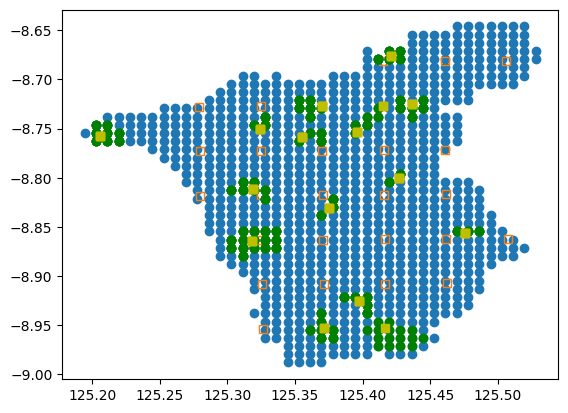

In [11]:
import pandas as pd
import numpy as np
from dynamic_models.single_step import single_step_area
from dynamic_models.visuializer import show_facility_location

#data constants
distances = pd.read_csv("../data/ermera_full/processed/distances.csv").drop(columns=["Unnamed: 0"])
homes = populations
locations = facilities
periods_df = pd.DataFrame([1,2,3,4])
periods = periods_df[0]
per_period = 1
max_distance = 2
open_facilities = facilities["is_built"]
vpop = homes["Population"]


Z, X, building = single_step_area(distances, homes, locations, periods, per_period, max_distance, open_facilities, vpop)

xC = homes['Pop_Lon']
yC = homes['Pop_Lat']
xF = locations['Grid_Lon']
yF = locations['Grid_Lat']

show_facility_location(xC, yC, xF, yF, X=X, Z=Z, homes=homes, locations=locations, periods=periods)